<a href="https://colab.research.google.com/github/eftekhari-mhs/api-python/blob/master/Exact_Majority/Clock_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
import math
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's look at the first time that 0.1 percent and 90 percent of the population residing in hour $i$:

In [3]:
#@title Fix a population size, let's look at different pvalues and kvalues: (Average of 20 trials)

#@markdown make sure .txt files are uploaded

path = "/content/drive/My Drive/Colab_majority/clock_hitting_time_p10_p90_"
import requests

# url = 'https://raw.githubusercontent.com/eftekhari-mhs/population-protocols/master/Exact_Majority/simulation_results/clock_hitting_time_p10_p90_'

#@markdown fix p=0.01 change k : "N_9508_LOG_13", "N_26544_LOG_14","N_35258_LOG_15","N_76723_LOG_16" (one way epidemic)

#@markdown fix p=0.01 change k : "N_9508_LOG_13", "N_26544_LOG_14","N_35258_LOG_15","N_76723_LOG_16" (two way epidemic)
nvalues_fixp = ["N_1000_LOG_20", "N_10000_LOG_20", "N_100000_LOG_20","N_1000000_LOG_20"]
#@markdown fix k=5 change p : "N_12146_LOG_13", "N_23141_LOG_14", "N_53022_LOG_15", "N_91829_LOG_16","N_211023_LOG_17"(one way epidemic)
nvalues_fixk = ["N_1000_LOG_20", "N_10000_LOG_20","N_100000_LOG_20","N_1000000_LOG_20"]
# population_size = "N_26544_LOG_14" #@param ["N_12146_LOG_13", "N_23141_LOG_14", "N_53022_LOG_15", "N_91829_LOG_16","N_211023_LOG_17","N_9508_LOG_13", "N_26544_LOG_14","N_35258_LOG_15","N_76723_LOG_16" ] 

# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

def plot_average(mylist, fixp, fixk):
  # fig, axs = plt.subplots(len(mylist),figsize=(15,15))
  fig, ax = plt.subplots(figsize = (6,3))
  if fixk:
    plt.title('time per synchronous hour in different n, p for fixed k = 5')    
  if fixp:
    plt.title('time per synchronous hour in different n, k for fixed p = 0.01') 
    slopes = []   
  i=0
  ns = []
  for nx in mylist:
    n = int(nx.split("_")[1])
    ns.append(n)
    logn = int(nx.split("_")[3])
    if fixk:
      nx = nx + "_fixk"
    if fixp:
      nx = nx + "_fixp"
    filename = path+nx+".txt"
    
    # req = requests.get(filename, stream=True)
    
    file = open(filename, 'r') 
    Lines = file.readlines()     
    line_number = 0
    ave_fixk = {}
    ave_fixp = {}
    # Strips the newline character 
    for line in Lines: 
    # for line in req.iter_lines():
      # line = line[2:-1]
      # line = line.decode("utf-8")       
      line_number = line_number + 1  
      if line != '404: Not Found':                    
        if line_number%2 == 1:
          s = line.strip().split("_")        
          pvalue = float(s[1])      
          kvalue = int(s[3])              
        else: 
          diff = [float(s) for s in line.strip()[1:-1].split(",")]    
          if kvalue ==5:
            ave_fixk[pvalue]= np.mean(diff)
          if pvalue ==0.01:
            ave_fixp[kvalue]= np.mean(diff)        
      else:
        print(line)
    
    if fixk:
      lists = sorted(ave_fixk.items()) # sorted by key, return a list of tuples
    if fixp:
      lists = sorted(ave_fixp.items()) # sorted by key, return a list of tuples      
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    
    x = np.array(x)
    y = np.array(y) 
    ax.plot(x, y)    
    if fixp:
      model = LinearRegression().fit(x.reshape((-1, 1)), y)
      slopes.append(model.coef_[0])
    # plt.plot(x[outlier:], y[outlier:])
  plt.ylabel("time per synchronous hour")   
  if fixk:
    plt.xlabel("p")
    plt.legend([f'n = 10^{int(np.log10(n))}' for n in ns])  
    # axs[i].set_yscale('log')
    # axs[i].set_xscale('log')
    # axs[i].set_title(f"pvalues, n = {n}")      
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    # ax.set_title(f"pvalues, n = {n}")    
    # plt.xlabel(f"pvalues, k = 5, n = {n}")
  if fixp:
    plt.xlabel("k")
    plt.legend([f'n = 10^{int(np.log10(n))}, slope = {slope:.3f}' for n, slope in zip(ns, slopes)])  
    # axs[i].set_title(f"kvalues, n = {n}")      
    # ax.set_title(f"kvalues, n = {n}")    
    ax.set_xticks(np.arange(1,21,1))
    # plt.xlabel(f"kvalues, n = {n}")
  i+=1
  return fig, ax

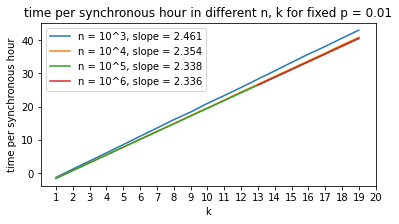

In [4]:
fig, ax = plot_average(nvalues_fixp, True, False)
fig.savefig('hour_length_varying_k.pdf')
fig.savefig('hour_length_varying_k.svg')

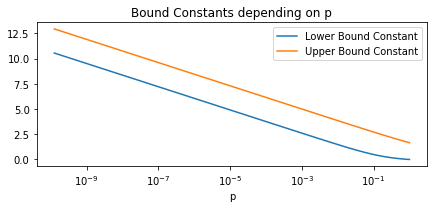

In [5]:
from scipy.integrate import quad

ps = [10 ** (i/10) for i in range(0, -100, -1)]
lower_bound_constants = []
upper_bound_constants = []
for p in ps:
  lower_bound_constants.append(quad(lambda x: 1 / (p * ((1 - x) ** 2) + 2 * x * (1-x)), 0.1*p, 0.1)[0])
  upper_bound_constants.append(quad(lambda x: 1 / (p * ((0.9 - x) ** 2) + 2 * x * (1-x)), 0, 0.9)[0])
fig = plt.figure(figsize = (6,3))
plt.plot(ps, lower_bound_constants)
plt.plot(ps, upper_bound_constants)
plt.xscale("log")
plt.xlabel("p")
plt.title("Bound Constants depending on p")
plt.legend(["Lower Bound Constant", "Upper Bound Constant"])
plt.tight_layout()
fig.savefig('bound_constants.pdf')
fig.savefig('bound_constants.svg')

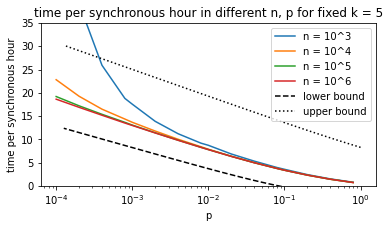

In [6]:
fig, ax = plot_average(nvalues_fixk, False, True)

ps = [10 ** (i/10) for i in range(0, -40, -1)]
lower_bounds = []
upper_bounds = []
for p in ps:
  lower_bounds.append(quad(lambda x: 1 / (p * ((1 - x) ** 2) + 2 * x * (1-x)), 0.1*p, 0.1)[0] * 4 - 2.2)
  upper_bounds.append(quad(lambda x: 1 / (p * ((0.9 - x) ** 2) + 2 * x * (1-x)), 0, 0.9)[0] * 5)

plt.plot(ps, lower_bounds, linestyle = 'dashed', color = 'k')
plt.plot(ps, upper_bounds, linestyle = 'dotted', color = 'k')
plt.ylim(0, 35)
plt.legend([f'n = 10^{i}' for i in range(3,7)] + ['lower bound', 'upper bound'])
fig.savefig('hour_length_varying_p.pdf')
fig.savefig('hour_length_varying_p.svg')


## Old codes.

In [10]:
#@title Fix a population size, let's look at different pvalues and kvalues:
#
#@markdown make sure .txt files are uploaded

path = "/content/drive/My Drive/Colab_majority/clock_hitting_time_p10_p90_"

population_size = "N_2797144_LOG_21" #@param ["N_613213_LOG_19", "N_2797144_LOG_21"]
n = int(population_size.split("_")[1])
logn = int(population_size.split("_")[3])
filename = path+population_size+".txt"
# Using readlines() 
file1 = open(filename, 'r') 
Lines = file1.readlines() 

pvalue = 0.1;
kvalue = 1;
count = 0
# Strips the newline character 
for line in Lines: 
    count+=1
    # print("Line{}: {}".format(count, line.strip()))   
    if count%3 == 1:
      s = line.strip().split("_")
      # print(s)
      pvalue = float(s[1])      
      kvalue = int(s[3])      
      print(f"Pvalue is {pvalue} and Kvalue is {kvalue} (number of minutes per hour).") 
    elif count%3 == 2:      
      percent10 = [int(s) for s in line.strip()[1:-1].split(",")]      
      print(f"0.1%: {percent10}")
    else: 
      percent90 = [int(s) for s in line.strip()[1:-1].split(",")]
      print(f"90%: {percent90}")
      # plt.plot(np.array(percent90[1:])/n,'g*', np.array(percent10[:-1])/n, 'ro')
      plt.plot(np.array(percent10[:-2])/n- np.array(percent90[1:-1])/n, 'ro')
      plt.show()
      # diff = [(a_i - b_i)/n for a_i, b_i in zip(percent90, percent10)]
      # plt.plot(diff, 'bo')
      plt.show()


From the above computation, we can observe that ``pvalue = 1`` or ``kvalue =1`` are not good choices. In some of the plots the difference is not stable. 

#### Fixing pvalue and kvalue, increasing population size:

In [ ]:
#@title Fix the pvalues and kvalues, let's look at different population sizes:
#
#@markdown make sure .txt files are uploaded
#
# Import the required libraries

path = "/content/drive/My Drive/Colab_majority/clock_hitting_time_p10_p90_"

# population_size = "P_0.100000_K_3" #@param ["P_0.100000_K_2", "P_0.100000_K_3", "P_0.100000_K_4", "P_0.100000_K_5", "P_0.010000_K_2", "P_0.010000_K_2", "P_0.010000_K_3"]
kval = "3" #@param ["2", "3", "4", "5"]
pval = "0.1" #@param ["0.1", "0.01", "0.001", "0.0001"]
# p = float(population_size.split("_")[1])
# k = int(population_size.split("_")[3])

pvalue = float(pval)
k = int(kval)

pk_description = "P_{:.6f}_K_{}".format(float(pvalue), k)
filename = path+pk_description+".txt"
# Using readlines() 
file1 = open(filename, 'r') 
Lines = file1.readlines() 
  
count = 0
# Strips the newline character 
n = 1;
logn = 1;
for line in Lines: 
    count+=1
    # print("Line{}: {}".format(count, line.strip()))
    if count%3 == 1:
      s = line.strip().split("_")
      # print(s)
      n = int(s[1])      
      logn = int(s[3])      
      print(f"Population size (n) is {n} and log(n) is {logn} (number of hours).") 
    elif count%3 == 2:      
      percent10 = [int(s) for s in line.strip()[1:-1].split(",")]      
      print(f"10%: {percent10}")
    else: 
      percent90 = [int(s) for s in line.strip()[1:-1].split(",")]
      print(f"90%: {percent90}")
      # plt.plot(percent10,'g*', percent90, 'ro')
      # plt.show()
      diff = [(a_i - b_i)/n for a_i, b_i in zip(percent90, percent10)]
      plt.plot(diff, 'bo')
      plt.show()


# Plots from Java simuations

**To use this notebook, click on 'Runtime' and select 'Run all'**.

In [ ]:
#@title Technical details: data selection
#
#
#@markdown make sure .txt files are uploaded
#

_PATH = "/content/drive/My Drive/Colab Notebooks/constant_interval_clock_"
_LEVEL = "levels_"
_DRIP = "drip_"

_LEVELD = "levelsd_"
_DRIPD = "dripd_"

def get_clock_levels(filename, size, k):
  exist = True
  try:
    df = pd.read_csv(_PATH+filename+size+".txt", delimiter="\s+|;|,|\[|\]",
                                      names=None, 
                                      header=None, 
                                      engine="python")  
    df.dropna(axis=1, inplace=True)
    df.columns = [str(x) for x in range(0,_LOG*k+1)]  
          
  except:
    exist = False;
    df = pd.DataFrame
    print("there is no %s files"%filename)  
  return df, exist


In [ ]:
#@title Select a population size to plot { run: "auto" }
## @markdown N: population size; LOG: log(N); PValue: dripping probability ; K: max level = k*log n
## @markdown Every screen shot is taken after n/2 interactions for "N_16065_LOG_13", "N_28187_LOG_14", "N_154285_LOG_17", "N_487291_LOG_18", "N_2439409_LOG_21",
## @markdown Every screen shot is taken after n interactions for "N_5311784_LOG_22", "N_13871538_LOG_23", "N_18483817_LOG_24"
## @markdown clock with leak: "N_90010_LOG_16","N_120069_LOG_16"

## @markdown delayed: "N_3422_LOG_11", "N_16464_LOG_14"
## @markdown pvalue : 1 "N_746972_LOG_19", "N_3738_LOG_11"
file_description = "N_18353_LOG_14" #@param ["N_14505_LOG_13", "N_18353_LOG_14"]

_N = int(file_description.split('_')[1])
_LOG = int(file_description.split('_')[3])
p_value = "0.1"#@param ["1", "0.1", "0.01", "0.001", "0.0001"]
k = "2"#@param ["1", "2", "3", "4", "5"]

file_description = "N_{}_LOG_{}_P_{:.6f}_K_{}".format(_N, _LOG, float(p_value), k)

_PVALUE = float(file_description.split('_')[5])
_K = int(file_description.split('_')[7])

print("n: ",_N, "; log(n): ",_LOG, "; dripping probability:", _PVALUE, "; max level: ", _K, "log(n)")

try:
  levels, exist= get_clock_levels(_LEVEL,file_description, _K)
  drips, exist = get_clock_levels(_DRIP, file_description, _K)
except:
  print("file is missing!")

# try:
#   levels_d, exist= get_clock_levels(_LEVELD,file_description, _K)
#   drips_d, exist = get_clock_levels(_DRIPD, file_description, _K)
# except:
#   print("delayed file is missing!")


In [ ]:
levels

In [ ]:
# levels_d

In [ ]:
# dripped count only
drips

In [ ]:
#@title Technical details: plotting
#
def state_bar_plot(data, time, yscale = "linear"):
  dist = [data[str(i)][time] for i in range(0,_LOG*_K + 1)]
  plt.figure(figsize=(12,6))
  plt.bar(range(-_LOG,_LOG + 1),dist)
  plt.title(f"Time step {time}")
  plt.yscale(yscale)
  plt.ylim(bottom = 1, top = _N)
  plt.show()

def drip_bar_plot(total, drip, time, yscale = "linear"):
  total_dist = np.array([total[str(i)][time] for i in range(0,_LOG*_K + 1)])
  drip_dist = np.array([drip[str(i)][time] for i in range(0,_LOG*_K + 1)])
  no_drip_dist = total_dist - drip_dist
  plt.figure(figsize=(12,6))
  plt.bar(range(0,_LOG*_K + 1),no_drip_dist)
  plt.bar(range(0,_LOG*_K + 1),drip_dist, bottom = no_drip_dist)
  plt.legend(["Epidemic","Drip"])
  plt.title(f"Time step {time}")
  plt.hlines(y=(math.sqrt(_N))/_PVALUE, xmin=0, xmax=_LOG*_K , colors='aqua', linestyles='-', lw=2, label='n^0.5')
  # plt.hlines(y=pow(_N,0.25), xmin=0, xmax=_LOG*_K , colors='green', linestyles='-', lw=2, label='n^0.25')
  # plt.hlines(y=pow(_N,0.75), xmin=0, xmax=_LOG*_K , colors='blue', linestyles='-', lw=2, label='n^0.75')
  plt.yscale(yscale)
  plt.ylim(bottom = 1, top = _N)
  plt.show()


# Visualizing Clock Movement


In [ ]:
print("Levels:")
# levels.plot(figsize=(12,6))
interact(drip_bar_plot, total = fixed(levels), drip = fixed(drips), time = widgets.IntSlider(min=0, max=len(levels)-1, step=1, value=0), yscale = ["linear", "log"])

In [ ]:
# print("LevelsD:")
# # levels.plot(figsize=(12,6))
# interact(drip_bar_plot, total = fixed(levels_d), drip = fixed(drips_d), time = widgets.IntSlider(min=0, max=len(levels_d)-1, step=1, value=0), yscale = ["linear", "log"])

## Comparing Pvalues: 


In [ ]:
# file name format: "N_139476_LOG_17_P_0.000100_K_5"
file_description = "N_{}_LOG_{}_P_{:.6f}_K_{}".format(_N, _LOG, .1, _K)

for i in range(4):    
  try:    
    _PVALUE = float(file_description.split('_')[5])
    print("n: ",_N, "; log(n): ",_LOG, "; drip probability:", _PVALUE, "; max level: ", _K, "log(n)")
    levels, exist= get_clock_levels(_LEVEL,file_description, _K)
    drips, exist = get_clock_levels(_DRIP, file_description, _K)
    interact(drip_bar_plot, total = fixed(levels), drip = fixed(drips), time = widgets.IntSlider(min=0, max=len(levels)-1, step=1, value=0), yscale = ["linear", "log"])
  except:
    print("file is missing!")
  _PVALUE = _PVALUE/10  
  file_description = "N_{}_LOG_{}_P_{:.6f}_K_{}".format(_N, _LOG, _PVALUE, _K)